In [1]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
os.getcwd()
os.chdir('C:/Users/SivaKumar/Documents/cutetext/GNQ_Data')

In [3]:
d1 = open("m1.txt","r", encoding="latin")  
m1 = d1.readlines() 

In [4]:
d2 = open("m2.txt","r", encoding="latin")  
m2 = d2.readlines() 

In [5]:
d3 = open("m3.txt","r", encoding="latin")  
m3 = d3.readlines() 

In [6]:
d4 = open("m4.txt","r", encoding="latin")  
m4 = d4.readlines() 

In [7]:
d5= open("m5.txt","r", encoding="latin")  
m5= d5.readlines() 

In [8]:
d6 = open("m6.txt","r", encoding="latin")  
m6 = d6.readlines() 

In [9]:
d7= open("m7.txt","r", encoding="latin")  
m7 = d7.readlines() 

In [10]:
d8= open("m8.txt","r", encoding="latin")  
m8 = d8.readlines() 

In [11]:
text=pd.DataFrame({'review':[m1,m2,m3,m4,m5,m6,m7,m8]})

In [12]:
text

,review
0,[With nearly 80 years of experience making ani...
1,[Inside this entertaining Disney movie is a re...
2,[One of the reasons Frozen has become as popul...
3,[I still dont know what this movie is about be...
4,[Saw the movie yesterday it was good. Full of ...
5,[Toy Story 3 and Inside Out are sitting at 99%...
6,[ What ever happened to pure escapism that ent...
7,[The modern mammal metropolis of Zootopia is a...


In [13]:
positive = open("positive-words.txt","r", encoding="latin")  
pw= positive.readlines()[35:]

In [14]:
negative = open("negative-words.txt","r", encoding="latin")  
nw = negative.readlines()[35:]

In [15]:
pw=[re.sub("\n","",i)for i in pw]

In [16]:
nw=[re.sub("\n","",i)for i in nw]

In [17]:
for i in range(len(text)):
    text['review'][i] =' '.join(text['review'][i])


In [18]:
text.head()

,review
0,With nearly 80 years of experience making anim...
1,Inside this entertaining Disney movie is a rea...
2,One of the reasons Frozen has become as popula...
3,I still dont know what this movie is about bes...
4,Saw the movie yesterday it was good. Full of E...


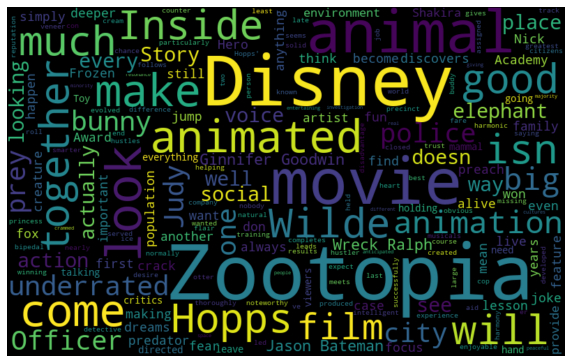

In [19]:
#word cloud for whole data
overall =' '.join([text for text in text['review']])

wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(overall)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [20]:
len(wordcloud.words_)

200

In [21]:
text['review'] = text['review'].str.lower()

In [22]:
text['processed_review'] = 0
for i in range(len(text)):
    text['processed_review'][i]=re.sub(r'[^A-Za-z]', ' ', text['review'][i]) 

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SivaKumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
for i in range(len(text)):
    text['processed_review'][i]=re.sub(r'[\s+]', ' ', text['processed_review'][i]) 

In [24]:
for i in range(len(text)):
    text['processed_review'][i]=word_tokenize(text['processed_review'][i]) 


In [25]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'what', 'does', 'all', 'weren', 'for', 'there', 'been', 'don', 'had', 'very', 'she', 'needn', "shouldn't", 'and', 'mightn', 'were', 'down', 'aren', 'he', 'you', 'should', 'hadn', 'will', 'off', "aren't", 'such', 'about', "wouldn't", 'their', "mightn't", 'where', 'd', 'after', 'to', 'so', 'them', "mustn't", 'haven', "wasn't", 'just', 'as', 'himself', 'nor', 'each', "won't", 'at', 'here', 'between', 'ourselves', 't', "hasn't", 'under', 'too', 'how', 'hasn', 'that', 'i', 'itself', 'his', "you've", 'into', 'which', 'most', 'did', 'up', 'its', 'below', 'from', 'more', 'be', "couldn't", "that'll", 'an', 'who', 'ours', 'our', "it's", "she's", 'o', 'll', 'both', "shan't", 'above', 'of', 'do', 'over', 'your', "hadn't", 'not', 'until', 'being', "doesn't", 'my', 'is', 'themselves', 'isn', 'in', 'own', 'during', 'through', 'while', 'any', 'whom', 'ma', 'we', 'has', 'further', 'shouldn', 'again', 'yourself', 'am', 'this', 'yours', 'they', 'are', 'no', 'then', 'once', "isn't", 're', 'against', 'out

In [26]:
for i in range(len(text)):
    text['processed_review'][i] = [token for token in text['processed_review'][i] if token not in stop_words]


In [27]:
 text.head()

,review,processed_review
0,with nearly 80 years of experience making anim...,"[nearly, years, experience, making, animated, ..."
1,inside this entertaining disney movie is a rea...,"[inside, entertaining, disney, movie, real, lo..."
2,one of the reasons frozen has become as popula...,"[one, reasons, frozen, become, popular, way, d..."
3,i still dont know what this movie is about bes...,"[still, dont, know, movie, besides, animals, l..."
4,saw the movie yesterday it was good. full of e...,"[saw, movie, yesterday, good, full, easter, eg..."


In [28]:
lmtzr = nltk.stem.WordNetLemmatizer()


In [29]:
for i in range(len(text)):
    text['processed_review'][i] = [lmtzr.lemmatize(plural) for plural in text['processed_review'][i]]


In [30]:
text.head(2)

,review,processed_review
0,with nearly 80 years of experience making anim...,"[nearly, year, experience, making, animated, f..."
1,inside this entertaining disney movie is a rea...,"[inside, entertaining, disney, movie, real, lo..."


In [31]:
text['positive']=0
text['negative']=0

In [32]:
pw[0]

'a+'

In [33]:
text.head()

,review,processed_review,positive,negative
0,with nearly 80 years of experience making anim...,"[nearly, year, experience, making, animated, f...",0,0
1,inside this entertaining disney movie is a rea...,"[inside, entertaining, disney, movie, real, lo...",0,0
2,one of the reasons frozen has become as popula...,"[one, reason, frozen, become, popular, way, di...",0,0
3,i still dont know what this movie is about bes...,"[still, dont, know, movie, besides, animal, lo...",0,0
4,saw the movie yesterday it was good. full of e...,"[saw, movie, yesterday, good, full, easter, eg...",0,0


In [34]:
text.head()

,review,processed_review,positive,negative
0,with nearly 80 years of experience making anim...,"[nearly, year, experience, making, animated, f...",0,0
1,inside this entertaining disney movie is a rea...,"[inside, entertaining, disney, movie, real, lo...",0,0
2,one of the reasons frozen has become as popula...,"[one, reason, frozen, become, popular, way, di...",0,0
3,i still dont know what this movie is about bes...,"[still, dont, know, movie, besides, animal, lo...",0,0
4,saw the movie yesterday it was good. full of e...,"[saw, movie, yesterday, good, full, easter, eg...",0,0


In [35]:
for i in range(len(text)):
    text['positive'][i]= [x for x in pw if x in text['processed_review'][i]]

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
for i in range(len(text)):
    text['negative'][i]= [x for x in nw if x in text['processed_review'][i]]

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
text['processed_review'][0]

['nearly',
 'year',
 'experience',
 'making',
 'animated',
 'feature',
 'film',
 'disney',
 'developed',
 'reputation',
 'making',
 'thoroughly',
 'enjoyable',
 'family',
 'fare',
 'saying',
 'created',
 'another',
 'film',
 'anything',
 'particularly',
 'noteworthy',
 'come',
 'expect',
 'best',
 'known',
 'princess',
 'led',
 'musical',
 'disney',
 'animation',
 'roll',
 'late',
 'movie',
 'like',
 'academy',
 'award',
 'winning',
 'big',
 'hero',
 'underrated',
 'wreck',
 'ralph',
 'however',
 'zootopia',
 'simply',
 'another',
 'fun',
 'disney',
 'animated',
 'movie',
 'one',
 'greatest',
 'animated',
 'movie',
 'disney',
 'company',
 'ever',
 'produced',
 'world',
 'zootopia',
 'mammal',
 'evolved',
 'intelligent',
 'bipedal',
 'creature',
 'judy',
 'hopps',
 'ginnifer',
 'goodwin',
 'bunny',
 'always',
 'wanted',
 'police',
 'officer',
 'job',
 'normally',
 'held',
 'large',
 'animal',
 'nobody',
 'give',
 'much',
 'chance',
 'successfully',
 'completes',
 'police',
 'academy',
 

In [38]:
text.head(8)

,review,processed_review,positive,negative
0,with nearly 80 years of experience making anim...,"[nearly, year, experience, making, animated, f...","[award, best, enjoyable, fun, good, greatest, ...","[crack, disadvantage, fear, flair, hustler, jo..."
1,inside this entertaining disney movie is a rea...,"[inside, entertaining, disney, movie, real, lo...","[entertaining, important, peaceful, pretty, well]","[bias, fear, prejudice, ripped]"
2,one of the reasons frozen has become as popula...,"[one, reason, frozen, become, popular, way, di...","[amazing, available, charm, clear, enjoy, enou...","[criticism, disappointed, frozen, humming, jok..."
3,i still dont know what this movie is about bes...,"[still, dont, know, movie, besides, animal, lo...",[cute],[funny]
4,saw the movie yesterday it was good. full of e...,"[saw, movie, yesterday, good, full, easter, eg...","[better, good, loved]","[badly, critic, marginally, wreck]"
5,toy story 3 and inside out are sitting at 99% ...,"[toy, story, inside, sitting, think, writer, t...","[award, impressive, win]",[]
6,what ever happened to pure escapism that ente...,"[ever, happened, pure, escapism, entertains, c...","[blockbuster, entertains, good, important, pro...",[mindless]
7,the modern mammal metropolis of zootopia is a ...,"[modern, mammal, metropolis, zootopia, city, l...","[easy, fast, hero, like, modern, optimistic, r...","[crack, frigid, mystery, scam, shrew, tangled,..."


In [39]:
text['positive_score']=0

In [40]:
text['negative_score']=0

In [41]:
text.head(8)

,review,processed_review,positive,negative,positive_score,negative_score
0,with nearly 80 years of experience making anim...,"[nearly, year, experience, making, animated, f...","[award, best, enjoyable, fun, good, greatest, ...","[crack, disadvantage, fear, flair, hustler, jo...",0,0
1,inside this entertaining disney movie is a rea...,"[inside, entertaining, disney, movie, real, lo...","[entertaining, important, peaceful, pretty, well]","[bias, fear, prejudice, ripped]",0,0
2,one of the reasons frozen has become as popula...,"[one, reason, frozen, become, popular, way, di...","[amazing, available, charm, clear, enjoy, enou...","[criticism, disappointed, frozen, humming, jok...",0,0
3,i still dont know what this movie is about bes...,"[still, dont, know, movie, besides, animal, lo...",[cute],[funny],0,0
4,saw the movie yesterday it was good. full of e...,"[saw, movie, yesterday, good, full, easter, eg...","[better, good, loved]","[badly, critic, marginally, wreck]",0,0
5,toy story 3 and inside out are sitting at 99% ...,"[toy, story, inside, sitting, think, writer, t...","[award, impressive, win]",[],0,0
6,what ever happened to pure escapism that ente...,"[ever, happened, pure, escapism, entertains, c...","[blockbuster, entertains, good, important, pro...",[mindless],0,0
7,the modern mammal metropolis of zootopia is a ...,"[modern, mammal, metropolis, zootopia, city, l...","[easy, fast, hero, like, modern, optimistic, r...","[crack, frigid, mystery, scam, shrew, tangled,...",0,0


In [42]:
for i in range(len(text)):
    text['positive_score'][i]=len(text['positive'][i])

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
for i in range(len(text)):
    text['negative_score'][i]=len(text['negative'][i])

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
text.head(8)

,review,processed_review,positive,negative,positive_score,negative_score
0,with nearly 80 years of experience making anim...,"[nearly, year, experience, making, animated, f...","[award, best, enjoyable, fun, good, greatest, ...","[crack, disadvantage, fear, flair, hustler, jo...",21,7
1,inside this entertaining disney movie is a rea...,"[inside, entertaining, disney, movie, real, lo...","[entertaining, important, peaceful, pretty, well]","[bias, fear, prejudice, ripped]",5,4
2,one of the reasons frozen has become as popula...,"[one, reason, frozen, become, popular, way, di...","[amazing, available, charm, clear, enjoy, enou...","[criticism, disappointed, frozen, humming, jok...",24,6
3,i still dont know what this movie is about bes...,"[still, dont, know, movie, besides, animal, lo...",[cute],[funny],1,1
4,saw the movie yesterday it was good. full of e...,"[saw, movie, yesterday, good, full, easter, eg...","[better, good, loved]","[badly, critic, marginally, wreck]",3,4
5,toy story 3 and inside out are sitting at 99% ...,"[toy, story, inside, sitting, think, writer, t...","[award, impressive, win]",[],3,0
6,what ever happened to pure escapism that ente...,"[ever, happened, pure, escapism, entertains, c...","[blockbuster, entertains, good, important, pro...",[mindless],7,1
7,the modern mammal metropolis of zootopia is a ...,"[modern, mammal, metropolis, zootopia, city, l...","[easy, fast, hero, like, modern, optimistic, r...","[crack, frigid, mystery, scam, shrew, tangled,...",8,7


In [45]:
text['score']=text['positive_score']-text['negative_score']

In [46]:
text.head(8)

,review,processed_review,positive,negative,positive_score,negative_score,score
0,with nearly 80 years of experience making anim...,"[nearly, year, experience, making, animated, f...","[award, best, enjoyable, fun, good, greatest, ...","[crack, disadvantage, fear, flair, hustler, jo...",21,7,14
1,inside this entertaining disney movie is a rea...,"[inside, entertaining, disney, movie, real, lo...","[entertaining, important, peaceful, pretty, well]","[bias, fear, prejudice, ripped]",5,4,1
2,one of the reasons frozen has become as popula...,"[one, reason, frozen, become, popular, way, di...","[amazing, available, charm, clear, enjoy, enou...","[criticism, disappointed, frozen, humming, jok...",24,6,18
3,i still dont know what this movie is about bes...,"[still, dont, know, movie, besides, animal, lo...",[cute],[funny],1,1,0
4,saw the movie yesterday it was good. full of e...,"[saw, movie, yesterday, good, full, easter, eg...","[better, good, loved]","[badly, critic, marginally, wreck]",3,4,-1
5,toy story 3 and inside out are sitting at 99% ...,"[toy, story, inside, sitting, think, writer, t...","[award, impressive, win]",[],3,0,3
6,what ever happened to pure escapism that ente...,"[ever, happened, pure, escapism, entertains, c...","[blockbuster, entertains, good, important, pro...",[mindless],7,1,6
7,the modern mammal metropolis of zootopia is a ...,"[modern, mammal, metropolis, zootopia, city, l...","[easy, fast, hero, like, modern, optimistic, r...","[crack, frigid, mystery, scam, shrew, tangled,...",8,7,1


In [47]:
text['sentiment']=0

In [48]:
text.score[text.score >=1]=1
text.score[text.score<1]=0


C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
text.head(8)

,review,processed_review,positive,negative,positive_score,negative_score,score,sentiment
0,with nearly 80 years of experience making anim...,"[nearly, year, experience, making, animated, f...","[award, best, enjoyable, fun, good, greatest, ...","[crack, disadvantage, fear, flair, hustler, jo...",21,7,1,0
1,inside this entertaining disney movie is a rea...,"[inside, entertaining, disney, movie, real, lo...","[entertaining, important, peaceful, pretty, well]","[bias, fear, prejudice, ripped]",5,4,1,0
2,one of the reasons frozen has become as popula...,"[one, reason, frozen, become, popular, way, di...","[amazing, available, charm, clear, enjoy, enou...","[criticism, disappointed, frozen, humming, jok...",24,6,1,0
3,i still dont know what this movie is about bes...,"[still, dont, know, movie, besides, animal, lo...",[cute],[funny],1,1,0,0
4,saw the movie yesterday it was good. full of e...,"[saw, movie, yesterday, good, full, easter, eg...","[better, good, loved]","[badly, critic, marginally, wreck]",3,4,0,0
5,toy story 3 and inside out are sitting at 99% ...,"[toy, story, inside, sitting, think, writer, t...","[award, impressive, win]",[],3,0,1,0
6,what ever happened to pure escapism that ente...,"[ever, happened, pure, escapism, entertains, c...","[blockbuster, entertains, good, important, pro...",[mindless],7,1,1,0
7,the modern mammal metropolis of zootopia is a ...,"[modern, mammal, metropolis, zootopia, city, l...","[easy, fast, hero, like, modern, optimistic, r...","[crack, frigid, mystery, scam, shrew, tangled,...",8,7,1,0


In [50]:
for i in range(len(text)):
    text['processed_review'][i] =' '.join(text['processed_review'][i])


C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
x_train, x_val, y_train, y_val = train_test_split(text['processed_review'],text['score'],test_size = 0.2, random_state = 123)

In [52]:
textf = CountVectorizer(stop_words='english',lowercase=True,strip_accents='unicode',decode_error='ignore')


In [53]:
word_matrix=textf.fit_transform(x_train)

In [54]:
word_matrix

<6x261 sparse matrix of type '<class 'numpy.int64'>'
	with 293 stored elements in Compressed Sparse Row format>

In [55]:
word_matrixtest=textf.transform(x_val)

In [56]:
logistic=LogisticRegression()
logmod=logistic.fit(word_matrix,y_train)

In [57]:
trainpred=logmod.predict(word_matrix)

In [58]:
testpred=logmod.predict(word_matrixtest)

In [59]:
y_val

0    1
1    1
Name: score, dtype: int64

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(trainpred,y_train)

array([[2, 0],
       [0, 4]], dtype=int64)

In [62]:
confusion_matrix(testpred,y_val)

array([[2]], dtype=int64)

In [63]:
accuracy_score(y_train,trainpred)


1.0

In [64]:
accuracy_score(y_val,testpred)


1.0

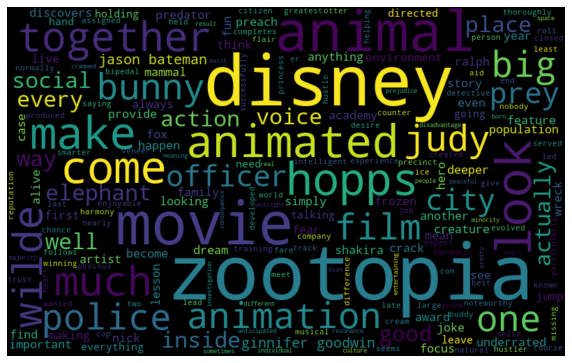

In [65]:
#word cloud for processed review wirh positive case
User1 =' '.join([text for text in text['processed_review'][text['score'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(User1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

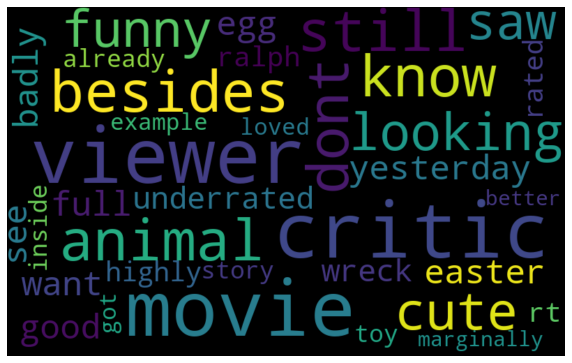

In [66]:
#word cloud for processed review wirh negative case
User1 =' '.join([text for text in text['processed_review'][text['score'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(User1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [67]:
tfidf_transformer = TfidfVectorizer(ngram_range=(1,1),stop_words='english')
X_train_tfid = tfidf_transformer.fit_transform(x_train)
X_test_tfid = tfidf_transformer.transform(x_val)


In [68]:
X_train_tfid.shape

(6, 261)

In [69]:
X_test_tfid.shape

(2, 261)

In [70]:
logistic1=LogisticRegression()
logmod1=logistic1.fit(X_train_tfid,y_train)

In [71]:
trainpred1 =logistic1.predict(X_train_tfid)

In [72]:
testpred1 =logistic1.predict(X_test_tfid)

In [73]:
confusion_matrix(trainpred1,y_train)

array([[0, 0],
       [2, 4]], dtype=int64)

In [74]:
confusion_matrix(testpred1,y_val)

array([[2]], dtype=int64)

In [75]:
accuracy_score(y_train,trainpred1)


0.6666666666666666

In [76]:
accuracy_score(y_val,testpred1)


1.0

In [77]:
#from the both models the model with logistic and count vectorizer performs better

In [78]:
##  weighted average is the better error metric in this case